# Business Problem
We are a scaleup with a flagship product of a social media platform where users can make posts and comments on those posts. Recently we have noticed that there seems to be quite a lot of negative comments spreading across the platform. We want to introduce an early warning system to users that will produce a warning if the system detects that the comment they are about to post is negative. To make this warning system we are interested in making a model that can perform sentiment analysis in real-time.  

# Data Collection
We collect data on social media platform interactions with a specification of negative, neutral or positive sentiment.

In [112]:
# Installing necessary packages
!pip install huggingface_hub -q

In [113]:
# Importing dataset and converting it to a dataframe
import pandas as pd

splits = {'train': 'train_df.csv', 'validation': 'val_df.csv', 'test': 'test_df.csv'}
sentiment_df_original = pd.read_csv("hf://datasets/Sp1786/multiclass-sentiment-analysis-dataset/" + splits["train"])
sentiment_df_original.head()

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative


In [114]:
# Checking the number of rows and columns of the dataframe
sentiment_df_original.shape

(31232, 4)

In [115]:
# Reducing dataframe to 10000 rows to reduce computation time
sentiment_df = sentiment_df_original.sample(10000, random_state=42).reset_index(drop=True)
sentiment_df.shape

(10000, 4)

In [116]:
# Showing the first 5 rows of the dataframe
sentiment_df.head()

,id,text,label,sentiment
0,10477,@mashable I never did thank you for including ...,2,positive
1,16099,Happy Mothers Day!!,2,positive
2,18745,Welcome home! Glad you made it home safe!,2,positive
3,26119,@__Jasper_Hale__ *Laughs* that`s because I lik...,2,positive
4,25772,Getting ready for work... think I`m catching a...,1,neutral


In [117]:
# Exporting dataframe texts in a tab separated .txt file to perform key-word analysis with ChatGPT
from pathlib import Path

my_text = sentiment_df["text"].str.cat(sep="\t")

file_path = Path("output.txt")
file_path.write_text(my_text, encoding="utf-8")

978344

Keyword analysis reveals keywords such as retweet, plurk, timeline, subscribe and tumblr.com. This indicates that the texts originate from many different social media platforms such as Twitter, Plurk, Facebook, Youtube and Tumblr.

## Definition of Attributes
- **id**: the dataset id of the text
- **text**: The text the person wrote
- **label**: Integer label denoting the sentiment
- **sentiment**: The sentiment of the text

## Data Collection Overview
**Process**
- Gathered 31232 rows of textual data with accompanying sentiment in both integer and text format from huggingface.
- Converted the dataset to a dataframe and resampled it to 10000 rows to reduce computation time.
- Performed keyword analysis of the dataframe texts. 

**Findings**
- The collected texts from huggingface originate from many different social media platforms.

# Data Understanding: Exploratory Data Analysis (EDA)
We explore the distributions of the dataframe attributes. 

In [122]:
# Installing necessary packages
!pip install wordcloud -q

In [123]:
# Checking the amount of null values and data types of attributes
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         10000 non-null  int64 
 1   text       10000 non-null  object
 2   label      10000 non-null  int64 
 3   sentiment  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [124]:
# Checking the statistical distribution of attributes
sentiment_df.describe(include="all")

,id,text,label,sentiment
count,10000.000000,10000,10000.000000,10000
unique,NaN,10000,NaN,3
top,NaN,@mashable I never did thank you for including ...,NaN,neutral
freq,NaN,1,NaN,3716
mean,10582.189700,NaN,1.041000,NaN
std,8006.634763,NaN,0.791695,NaN
min,0.000000,NaN,0.000000,NaN
25%,3495.750000,NaN,0.000000,NaN
50%,8740.000000,NaN,1.000000,NaN
75%,17042.750000,NaN,2.000000,NaN


In [125]:
# Checking the amount of unique values for id
sentiment_df["id"].nunique()

9051

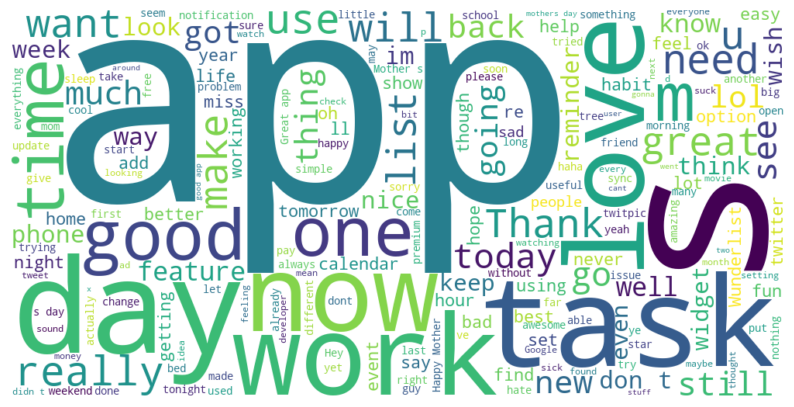

In [126]:
# Making a wordcloud to visualize the most used words
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combining all text into one string
text_data = sentiment_df["text"].str.cat(sep=" ")

# Creating a word cloud from the text string
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text_data)

# Visualizing the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

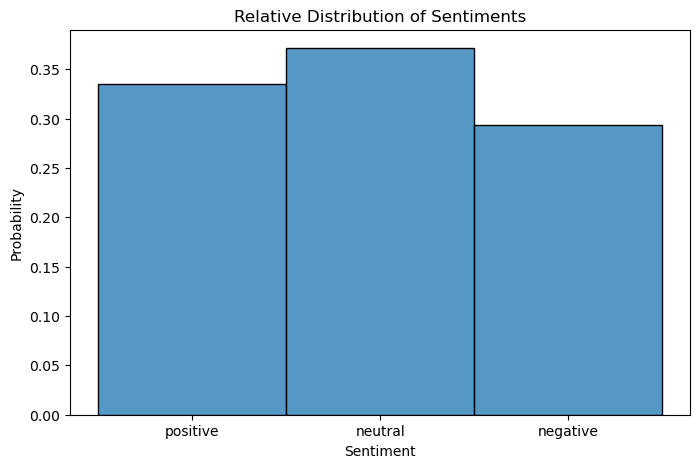

In [127]:
# Checking the distribution of sentiment types
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(data=sentiment_df, x="sentiment", stat="probability")

plt.title("Relative Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Probability")
plt.show()

In [128]:
# Performing n-gram analysis to find common phrases
from sklearn.feature_extraction.text import CountVectorizer

# Creating a variable to contain the array of texts
text_array = sentiment_df["text"]

# Creating the CountVectorizer object for trigrams (three words)
vectorizer = CountVectorizer(ngram_range=(3, 3))

# Fitting and transform the text
X = vectorizer.fit_transform(text_array)

# Showing the 20 most common trigrams (3 connected words)
trigram_df = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names_out())
trigram_frequencies = trigram_df.sum(axis=0).sort_values(ascending=False)
trigram_frequencies.head(20)

http twitpic com      104
easy to use            77
happy mother day       77
be able to             67
this app is            65
love this app          60
http bit ly            60
happy mothers day      59
to go to               58
it would be            57
to do list             53
http tinyurl com       53
you have to            53
the app is             52
day to all             43
to be able             42
http plurk com         42
thanks for the         39
mother day to          35
looking forward to     34
dtype: Sparse[int64, 0]

## Data Understanding Overview
**Process**
- Checked the null values and data types for dataframe attributes.
- Investigated the statistical distribution of dataframe attributes.
- Checked the amount of unique id values, to learn how many texts were written by the same person.
- Made a wordcloud of the most common words present in the dataframe texts.
- Checked the relative distribution of sentiment types.
- Performed trigram n-gram analysis to see the most frequently occurring three-word combinations. 

**Findings**
 - There are no null values in the dataset and all data types are accurate.
- The label mean of 1.04 indicates that the overall sentiment on social media platforms is leaning towards positivity.
- There are 10000 rows of text, but just 9051 unique values, so some people have written more than one text in the dataframe. 
- There are many mentions of the words app, day and task, which could indicate messages related to task management apps.
- Other common words are work, love and time, indicating that the texts are often related to what people do for a living, what they have positive sentiments towards and how the concept of time is prevalent on peoples' mind.
- The distribution between sentiment types is quite even with a bit more than 35% neutral sentiments, a bit less than 35% positive and about 30% negative. Since the difference between any sentiment type is only 5 percent point, there is no significant bias between them. 
- The most common occurrences of trigrams (3 words) are http twitpic com, easy to use and happy mother day. Since twitpic shut down on September 25, 2014, we can deduce that most of the texts are from twitter and before this time. The trigrams also indicate that something being easy to use, is important to people and that people tend to especially celebrate mothers day.  

# Data Preprocessing
We perform data cleaning to prepare for machine learning and deep learning. We reduce the text to its basic constituents and drop unnecessary features. 

In [131]:
# Installing necessary packages
!pip install nltk -q

In [132]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Downloading nltk resources
resources = ["punkt", "punkt_tab", "stopwords", "wordnet"]
for resource in resources:
    nltk.download(resource, quiet=True)

# Initializing lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Converting text to lowercase
    text = text.lower()

    # Removing everything from the text except letters, numbers, spaces and apostrophes
    text = re.sub(r"[^a-zA-Z0-9\s']", "", text)

    # Tokenizing the text (splitting up words)
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words("english"))
    cleaned_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatizing each token (reducing words to their root)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in cleaned_tokens]
    
    # Rejoining the words back into a string
    cleaned_text = " ".join(lemmatized_tokens)

    return cleaned_text

# Making a new attribute in the dataframe of the cleaned text
sentiment_df["cleaned_text"] = sentiment_df["text"].apply(clean_text)

# Showing the first 5 rows of the updated dataframe
sentiment_df.head()

,id,text,label,sentiment,cleaned_text
0,10477,@mashable I never did thank you for including ...,2,positive,mashable never thank including top 100 twitter...
1,16099,Happy Mothers Day!!,2,positive,happy mother day
2,18745,Welcome home! Glad you made it home safe!,2,positive,welcome home glad made home safe
3,26119,@__Jasper_Hale__ *Laughs* that`s because I lik...,2,positive,jasperhale laugh thats like winning
4,25772,Getting ready for work... think I`m catching a...,1,neutral,getting ready work think im catching cold yay ...


In [133]:
# Removing the id column which doesn't add any value to the sentiment analysis
sentiment_df_final = sentiment_df.drop("id", axis=1)

# Showing the final selection of columns
sentiment_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          10000 non-null  object
 1   label         10000 non-null  int64 
 2   sentiment     10000 non-null  object
 3   cleaned_text  10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


## Data Preprocessing Overview
**Process**
- Imported and downloaded packages for natural language preprocessing. 
- Converted texts to lowercase.
- Removed anything from the texts that is not a letter, a number, a whitespace or an apostrophe.
- Split up the texts by individual words.
- Removed any stop words.
- Reduced each word to their root through lemmatization.
- Rejoined the words back to texts. 
- Placed cleaned texts in a new feature in the dataframe. 

**Findings**
- The difference between the original text and the cleaned text is quite substantial, showing the amount of special characters present in social media texts. 

# Model Training and Evaluation
We train and evaluate machine learning models and the transformer model tinybert to perform sentiment analysis.

In [136]:
# Installing relevant packages
!pip install transformers[torch] accelerate datasets hf_xet -q

In [137]:
# Mathematical operations
import numpy as np

# Feature transformation
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [138]:
# Splitting data into training and testing dataframes
X = sentiment_df_final["cleaned_text"]
y = sentiment_df_final["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizing texts (splitting text into individual words)
X_train_tokenized = [word_tokenize(text) for text in X_train]
X_test_tokenized = [word_tokenize(text) for text in X_test]

# Training Word2Vec model on tokenized texts to convert words into vector representations
word2vec_model = Word2Vec(sentences=X_train_tokenized, vector_size=100, window=5, min_count=1, workers=4)

# Getting average vector for each word
def get_avg_vec(sentence, model):
    word_vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size) # Returning a zero vector if the word is not in the model's vocabulary
    return np.mean(word_vectors, axis=0)

# Converting texts to vectors
X_train_vec = np.array([get_avg_vec(text, word2vec_model) for text in X_train_tokenized])
X_test_vec = np.array([get_avg_vec(text, word2vec_model) for text in X_test_tokenized])

In [139]:
# Defining models and parameters
models = {
    "Logistic Regression": 
        (LogisticRegression(solver="liblinear", max_iter=200), 
        {
            "C": [0.1, 0.5, 1, 5, 10, 50], # Regularization strength
        }
    ), 
    "SVM": 
        (LinearSVC(), 
        {
            "C": [0.1, 0.5, 1, 5, 10, 50], # Regularization strength
            "tol": [1e-4, 1e-3, 1e-2] # Tolerance for optimization improvement for stopping training 
        }
    ), 
    "XGBoost": 
        (XGBClassifier(), 
        {
            "max_depth": [3, 6, 9], # Maximum depth of each tree
            "n_estimators": [50, 100], # Number of trees 
            "learning_rate": [0.05, 0.1], # Speed of optimization
            "subsample": [0.8, 1.0], # Fraction of training samples used for each tree
        }
    ), 
}

In [140]:
# Training ML models with GridSearchCV
best_models = {}

for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring="accuracy")
    grid_search.fit(X_train_vec, y_train)
    best_models[name] = grid_search.best_estimator_

    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Evaluating ML models
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return acc, report, cm

ml_results = {name: evaluate(model, X_test_vec, y_test) for name, model in best_models.items()}

for name, (acc, report, cm) in ml_results.items():
    print(f"{name}:\nAccuracy {acc:.4f}\n{report}\nconfusion matrix:\n {cm}\n")

Best parameters for Logistic Regression: {'C': 50}
Best parameters for SVM: {'C': 50, 'tol': 0.0001}
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50, 'subsample': 0.8}
Logistic Regression:
Accuracy 0.5040
              precision    recall  f1-score   support

           0       0.56      0.22      0.32       594
           1       0.45      0.64      0.53       737
           2       0.56      0.60      0.58       669

    accuracy                           0.50      2000
   macro avg       0.53      0.49      0.48      2000
weighted avg       0.52      0.50      0.48      2000

confusion matrix:
 [[133 339 122]
 [ 75 473 189]
 [ 29 238 402]]

SVM:
Accuracy 0.5130
              precision    recall  f1-score   support

           0       0.51      0.35      0.42       594
           1       0.46      0.54      0.50       737
           2       0.57      0.62      0.60       669

    accuracy                           0.51      2000
   macro avg    

In [141]:
# Deep learning
import torch

# Pretrained models, tokenizers and training utilities
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Dataset handling
from datasets import Dataset

# Reproducibility
from transformers import set_seed

# Defining transformer model and tokenizer
model_name = "huawei-noah/TinyBERT_General_4L_312D"
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)
tokenizer = BertTokenizer.from_pretrained(model_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [142]:
# Ensuring training reproducibility
torch.manual_seed(42)
set_seed(42)

# Setting variables to store true and predicted labels
y_true_tiny = []
y_pred_tiny = []

# Defining function to compute accuracy
def compute_evaluation_metrics(p):
    global y_true_tiny, y_pred_tiny
    
    # Getting predictions and true labels
    predictions, true_labels = p
    preds = predictions.argmax(axis=1)

    # Storing true labels and predicted labels
    y_true_tiny = true_labels.tolist()
    y_pred_tiny = preds.tolist()
    
    # Calculating accuracy
    acc = accuracy_score(y_true_tiny, y_pred_tiny)

    # Returning accuracy
    return {
        "accuracy": acc, 
    }

# Training TinyBERT
def train_transformer():
    # Specifying the maximum tokens per text
    max_length = 512
    
    # Tokenizing training and test dataframes
    X_train_enc = tokenizer(X_train.tolist(), padding=True, truncation=True, max_length = max_length, return_tensors="pt")
    X_test_enc = tokenizer(X_test.tolist(), padding=True, truncation=True, max_length = max_length, return_tensors="pt")

    # Mapping token ID's to attention masks and labels
    train_dataframe = Dataset.from_dict({
        "input_ids": X_train_enc["input_ids"], 
        "attention_mask": X_train_enc["attention_mask"], 
        "labels": y_train.tolist()
    })
    test_dataframe = Dataset.from_dict({
        "input_ids": X_test_enc["input_ids"], 
        "attention_mask": X_test_enc["attention_mask"], 
        "labels": y_test.tolist()})

    # Defining the training arguments
    training_args = TrainingArguments(
        output_dir=f"./tinybert_results", 
        per_device_train_batch_size=16, 
        per_device_eval_batch_size=16,
        gradient_accumulation_steps=2,
        fp16=True,
        num_train_epochs=3,
        warmup_steps=75,
        learning_rate=2e-5,
        load_best_model_at_end=True, 
        metric_for_best_model="accuracy", 
        greater_is_better=True,
        save_strategy="epoch", 
        eval_strategy="epoch"
    )
    
    # Initializing the trainer
    trainer = Trainer(
        model=model, 
        args=training_args, 
        train_dataset=train_dataframe, 
        eval_dataset=test_dataframe,
        compute_metrics=compute_evaluation_metrics
    )
    
    # Training the model
    trainer.train()
    return trainer

trainer = train_transformer()
results = trainer.evaluate()

# Showing the model's test results
print("\nTransformer Model Results:")
print(f"TinyBERT: {results}")

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.776149,0.676500
2,0.856500,0.742102,0.681500
3,0.856500,0.727268,0.696500



Transformer Model Results:
TinyBERT: {'eval_loss': 0.7272681593894958, 'eval_accuracy': 0.6965, 'eval_runtime': 12.4598, 'eval_samples_per_second': 160.516, 'eval_steps_per_second': 10.032, 'epoch': 3.0}


In [143]:
# Comparing ML and transformer models
print("ML Model Results:")
for name, (acc, report, cm) in ml_results.items():
    print(f"{name}:\nAccuracy {acc:.4f}\n{report}\nconfusion matrix:\n {cm}\n")

print("\nTransformer Model Results:")
print(f"TinyBERT: Accuracy={results['eval_accuracy']:.4f}\n")
print(f"Classification Report:\n{classification_report(y_true_tiny, y_pred_tiny)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_true_tiny, y_pred_tiny)}")

ML Model Results:
Logistic Regression:
Accuracy 0.5040
              precision    recall  f1-score   support

           0       0.56      0.22      0.32       594
           1       0.45      0.64      0.53       737
           2       0.56      0.60      0.58       669

    accuracy                           0.50      2000
   macro avg       0.53      0.49      0.48      2000
weighted avg       0.52      0.50      0.48      2000

confusion matrix:
 [[133 339 122]
 [ 75 473 189]
 [ 29 238 402]]

SVM:
Accuracy 0.5130
              precision    recall  f1-score   support

           0       0.51      0.35      0.42       594
           1       0.46      0.54      0.50       737
           2       0.57      0.62      0.60       669

    accuracy                           0.51      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.51      0.51      0.51      2000

confusion matrix:
 [[208 280 106]
 [133 401 203]
 [ 63 189 417]]

XGBoost:
Accuracy 0.4760
     

## Model Training and Evaluation Overview
**Process**
- Imported packages needed for machine learning.
- Split data into training and testing.
- Tokenized texts.
- Converted tokenized texts into vector representations using word2vec. 
- Getting the average vector representation of words.
- Defined models Logistic Regression, LinearSVC and XGBClassifier with hyperparameters.
- Trained models on accuracy using GridSearchCV.  
- Evaluated models on accuracy, precision, recall, f1-score and confusion matrix
- Imported packages for deep learning. 
- Defined TinyBERT transformer model and tokenizer
- Trained and evaluated TinyBERT transformer model with accuracy scoring. 
- Compared machine learning model results with TinyBERT transformer model results to find the best model. 

**Findings**
- The best ML model is SVM which yields an accuracy of about 50%.
- SVM is best at predicting positive sentiment, and worst at predicting negative sentiment. 
- The transformer model TinyBERT yields an accuracy of about 70%.
- TinyBERT is like SVM also best at predicting positive sentiment, but worst at predicting neutral sentiment.
- The TinyBERT model is slightly better at predicting neutral and positive sentiment, but a lot better at predicting negative sentiment, than the SVM model. 
- The TinyBERT model is therefore the best model for predicting sentiment. 

# Model Interpretation
We seek to understand how the tinybert transformer model makes decisions. 

In [146]:
# Calculating the predicted class and class probabilities for the selected text
import torch.nn.functional as F

# Encoding the first 5 texts to tokens
for i in range(5):
    # Tokenizing the text
    sample_input = X_test.iloc[i]
    tokenized_sample = tokenizer(sample_input, padding=True, truncation=True, max_length=512, return_tensors="pt")
    
    # Predicting sentiment scores for the tokenized text
    with torch.no_grad():
        outputs = trainer.model(**tokenized_sample)
    
    # Getting the sentiment class with highest probability from the sentiment scores
    logits = outputs.logits
    predicted_class = logits.argmax(axis=-1).item()
    
    # Getting the probabilities for each class from the sentiment scores
    probs = F.softmax(logits, dim=-1)
    
    # Showing the text, the predicted class and the class probabilities
    print(sample_input)
    print(f"Predicted class: {predicted_class}")
    print(f"Class probabilities: {probs}\n")

bored waiting class start sigh midterm next week
Predicted class: 0
Class probabilities: tensor([[0.7778, 0.1629, 0.0593]])

ok shopping far fun unpacking bag
Predicted class: 2
Class probabilities: tensor([[0.0587, 0.1169, 0.8245]])

n't sync current list
Predicted class: 0
Class probabilities: tensor([[0.6166, 0.3366, 0.0468]])

yah footlong sausage mah halal placepiggy sausage bigger
Predicted class: 1
Class probabilities: tensor([[0.1487, 0.7024, 0.1490]])

day started wonderful kid cry kitty missing got back posting sign around
Predicted class: 2
Class probabilities: tensor([[0.1053, 0.3062, 0.5885]])



## Predicted Class and Class Probabilities
**Process**
- For the first 5 texts of the test dataframe we:
    - Tokenized the text.
    - Predicted sentiment scores of the text.
    - Got the sentiment class with highest probability from the sentiment scores.
    - Got the probabilities for each class from the sentiment scores. 

**Findings**
- For the first, second and fourth text, the model is quite confident about which class the text belongs to, with the predicted class being correct with more than a 70% probability.
- For the Third and fifth text the model is a bit more ambivalent with positive probabilities of 62% and 59%. This might be due to the lack of strong indicators in the text. The third text contains neutral words, but also the n't abbreviation, which the model might take as being part of a word like don't with a negative connotation, leading to a negative sentiment prediction. The fifth text includes both positive words like "wonderful" and negative words like "cry", which may be confusing the model. 

In [148]:
# Installing necessary packages
!pip install transformers_interpret -q

Text(0.5, 1.0, 'Word Attributions for First Text in Test Dataframe')

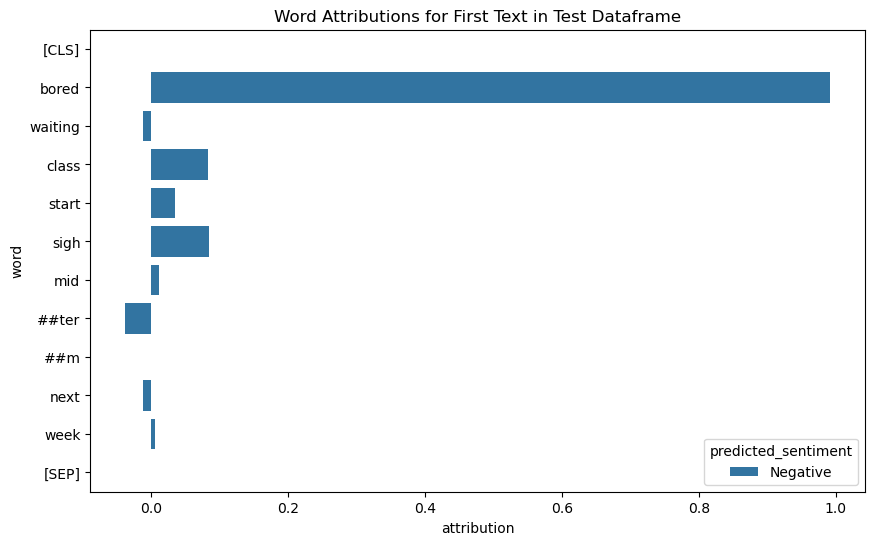

In [149]:
# Visualizing the impact of individual words in sentiment analysis for the first text of the test dataframe
from transformers_interpret import SequenceClassificationExplainer

# Initializing explainer
cls_explainer = SequenceClassificationExplainer(model, tokenizer)

# Getting attribution of words
word_attributions = cls_explainer(X_test.iloc[0])

# Converting attribution of words to dataframe
attributions_df = pd.DataFrame(word_attributions, columns=["word", "attribution"])

# Getting the model's sentiment prediction for the text
prediction = trainer.model(tokenizer(X_test.iloc[0], return_tensors="pt").input_ids)
predicted_label = prediction.logits.argmax(axis=1).item()

# Mapping predicted label to sentiment class
sentiment_classes = {0: "Negative", 1: "Neutral", 2: "Positive"}
predicted_sentiment = sentiment_classes[predicted_label]

# Adding the predicted sentiment to the Dataframe
attributions_df["predicted_sentiment"] = predicted_sentiment

# Visualizing word attributions
plt.figure(figsize=(10, 6))
sns.barplot(data=attributions_df, x="attribution", y="word", hue="predicted_sentiment")

plt.title("Word Attributions for First Text in Test Dataframe")

## Word attributions
**Process**
- Got the attribution of words for the first text in the test dataframe from the SequenceClassificationExplainer, which places the most impactful word at 100% and every other word relative to it.
- Converted the attribution of words to a dataframe.
- Got the model's sentiment prediction for the text.
- Mapped the sentiment integer label to the sentiment text class.
- Added the sentiment class to a new column in the dataframe.
- Visualized word attributions in a seaborn barplot. 

**Findings**
- The word "bored" has the highest impact on the model, leading to a negative sentiment prediction.
- The second and third most impactful words "class" and "sigh" has less than 1/10 of the impact of the word "bored", meaning that the word "bored" has the largest impact by far on the predicted sentiment of the text. 

Device set to use cpu


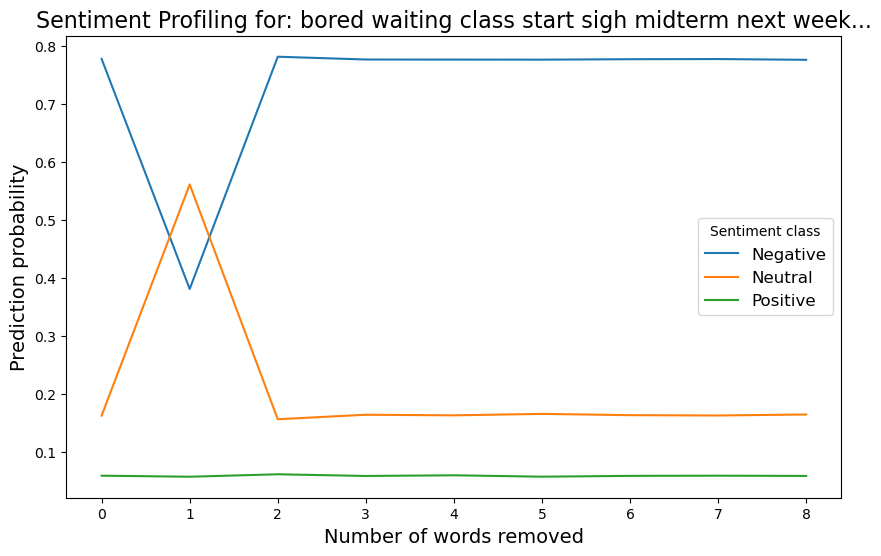

In [151]:
from transformers import pipeline

# Initializing the classifier and tokenizer
classifier = pipeline("text-classification", model=trainer.model, tokenizer=tokenizer)

# Function to calculate probability of each sentiment class
def get_sentiment_probs(text):
    encoded_sample = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    with torch.no_grad():
        outputs = trainer.model(**encoded_sample)
    logits = outputs.logits
    probs = F.softmax(logits, dim=-1)
    return probs    

# Function to iteratively leave out words and track the impact on sentiment class probabilities
def plot_sentiment_profile(text, classifier):
    words = text.split()

    # Initializing list to store the class probabilities at each step
    probabilities = []

    # Storing the initial class probabilities
    original_probs = get_sentiment_probs(text).squeeze().numpy()
    probabilities.append(original_probs)

    # Getting the predicted class probabilities for the text with the selected word left out
    for i in range(len(words)):
        # Leaving the ith word out from the text
        reduced_text = " ".join(words[:i] + words[i+1:])

        # Getting the new class probabilities after leaving out the word
        reduced_probs = get_sentiment_probs(reduced_text).squeeze().numpy()

        # Appending the class probabilities of the new text to the probabilities list
        probabilities.append(reduced_probs)

    # Converting class probabilities to a dataframe for easier visualization
    probs_df = pd.DataFrame(probabilities, columns=["Negative", "Neutral", "Positive"])

    # Plotting the gradual change of class probabilities as each word is left out
    plt.figure(figsize=(10, 6))
    for col in probs_df.columns:
        sns.lineplot(x=range(len(probs_df)), y=probs_df[col], label=col)

    # Formatting the plot
    plt.title(f"Sentiment Profiling for: {text[:50]}...", fontsize=16)
    plt.xlabel("Number of words removed", fontsize=14)
    plt.ylabel("Prediction probability", fontsize=14)
    plt.legend(title="Sentiment class", fontsize=12)
    plt.show()

# Creating sentiment profiling plot for the first text in the test dataframe
sample_text = X_test.iloc[0]
plot_sentiment_profile(sample_text, classifier)

## Sentiment profiling
**Process**
- Got the prediction and class probabilities for the first text of the test dataframe.
- Left out a single word from the text at a time starting from bored, and got the new text's sentiment prediction and class probabilities.
- Converted class probabilities to a dataframe.
- Visualized class probabilities for each word left out. 

**Findings**
- Simply removing the word "bored" changes the prediction from about 80% negative and 20% neutral to about 40% negative and 60% neutral. 
- Removing any other word than "bored", seems to have a negligible impact on the prediction probabilities. 
- This indicates that the model strongly associates the word "bored" with negative sentiment, whereas the rest of the words have virtually no impact.

# Model Deployment
We deploy the model as part of a streamlit app hosted on the streamlit community cloud. The app features an interactive analysis dashboard with a wordcloud for the sentiment classes of the dataframe, as well as an input field for custom real-time sentiment analysis.

In [154]:
# Installing packages needed for streamlit app
!pip install onnx onnxruntime -q

In [213]:
# Exporting model to the ONNX runtime format
from pathlib import Path
from onnxruntime.quantization import quantize_dynamic, QuantType
import joblib

# Function to export model to ONNX format
def export_to_quantized_onnx(model, tokenizer, dummy_inputs, onnx_path="model/tinybert_model_quantized.onnx"):
    trainer.model.eval() # Placing model in evaluation mode to disable training-specific behaviors to prepare for inferencing
    torch.onnx.export(
        trainer.model, # Model
        (dummy_inputs["input_ids"], dummy_inputs["attention_mask"]), # Model inputs
        "temp_model.onnx", # Output ONNX model file path 
        input_names=["input_ids", "attention_mask"], # Input names for ONNX model
        output_names=["logits"], # Output name for ONNX model's prediction vector
        dynamic_axes={ # Allows for varying text lengths and batch sizes
            "input_ids": {0: "batch_size", 1: "sequence_length"},
            "attention_mask": {0: "batch_size", 1: "sequence_length"},
            "logits": {0: "batch_size"}
        },
        opset_version=20, # ONNX operator set version
        do_constant_folding=True # Optimizes the model through simplification of operations
    )
    
    # Quantizing model to reduce its filesize
    quantize_dynamic(
        model_input="temp_model.onnx", 
        model_output=onnx_path, 
        weight_type=QuantType.QInt8
    )

    # Removing un-quantized version of the model
    Path("temp_model.onnx").unlink()
    
# Creating dummy input to define input and output signatures for ONNX
dummy_inputs = tokenizer("This is a dummy sentence.", return_tensors="pt")
export_to_quantized_onnx(trainer.model, tokenizer, dummy_inputs)

# Saving dataframe and tokenizer to files for streamlit app
joblib.dump(sentiment_df_final, "data/sentiment_text_data.pkl")
tokenizer.save_pretrained("data/tinybert_tokenizer")

('data/tinybert_tokenizer\\tokenizer_config.json',
 'data/tinybert_tokenizer\\special_tokens_map.json',
 'data/tinybert_tokenizer\\vocab.txt',
 'data/tinybert_tokenizer\\added_tokens.json')

## Model Deployment Overview
**Process**
- Saved data we need for the streamlit app. 
- Created the streamlit app through the following process:
    - Imported all the packages we need for the app.
    - Set the streamlit app to wide mode to encompass as many words as possible in the word cloud.
    - Created the app title.
    - Loaded data.
    - Created radio buttons to select sentiment type for filtering the dataframe to only texts with this sentiment.
    - Created wordcloud to show the most used words for the filtered dataframe.
    - Created input field to show sentiment prediction and probability for custom text. 
    - Cached data and model loading as well as the word cloud function to boost the performance of the app.
- Created a Github Repository with the project files.
- Connected the streamlit app to the streamlit community cloud. 

**Findings**
 - Wordcloud loads on average within 7 seconds when first choosing a segment, and in about one second on subsequent loads.
 - Predictions for custom text are made very quickly, consistently loading within 1 second.
 - The sentiment predictions have been tested on a variety of texts, and as long as the text is not overly convoluted, the sentiment classification accuracy is very high. 

## Using the streamlit app
- The app is accessible through a link, under the quick links section of the project's github repository. 

# Conclusion
**Problem**

Create an early warning system for a social media platform, that will warn users if the comment they are about to post has a negative sentiment, by applying a sentiment analysis model on the comment.  

**Process**

We collected textual data from an array of different social media sites.
We investigated the distributions behind this data, cleaned it up by reducing the text to its basic constituents and trained both machine learning models and the deep learning transformer model TinyBERT on it. We then evaluated these models based on accuracy and recall and interpreted the best performing model to get a better understanding of how it makes decisions. We made sentiment predictions and class probabilities for a selected array of texts, investigated word attributions in a text and performed sentiment profiling on a text to determine the impact of removing just one word from it. We then deployed it to a streamlit app, featuring a wordcloud of sentiment filtered words and an input field for custom text sentiment analysis with real-time sentiment prediction and class probability functionality. 

**Findings**

- The texts in the dataset originate from many different social media platforms. 
- The average sentiment for the texts lean towards positivity. 
- The texts contain a lot of special characters. 
- The transformer model TinyBERT is significantly better at accurately ascribing sentiment to a social media text, compared to traditional machine learning models, especially concerning negative sentiment. 
- A single word can have an enormous impact on the sentiment analysis, shifting the sentiment from one class to another.
- Through testing we learned that the TinyBERT model is excellent at accurately ascribing sentiment to a text, as long as the text is not overly convoluted. 

**Recommendations**

The TinyBERT model can be utilized directly in a business setting. Its inference speed being less than 1 second, allows it to provide real-time sentiment predictions, ideal for a social media platforms early warning system for potentially negative comments. 
Since the model is also excellent at ascribing sentiment to texts that are not overly convoluted, it should do a fine job for most social media interactions.
Even if the model were to inaccurately predict a sentiment, since it is only meant to serve as a warning system, the user will still be able to use their own judgment to decide whether or not to post their comment, minimizing consequences of faulty predictions. 

**Improvements**

Instead of using the TinyBERT model, we could have also used another transformer model such as DistilBERT or RoBERTa which could increase the accuracy of the sentiment analysis. These models are however significantly bigger, which could lead to slower inference speeds, reducing the usefulness of the model as a real-time sentiment analysis tool. 
Another alternative could be FastText which is a much simpler model providing even quicker sentiment analysis inference, but at the cost of accuracy.  